# Data Wrangling

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = "./data/Concrete_Data.xls"

raw_df = pd.read_excel(path)
raw_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
for i in raw_df.columns:
    print(i.split(" ("))

['Cement', 'component 1)(kg in a m^3 mixture)']
['Blast Furnace Slag', 'component 2)(kg in a m^3 mixture)']
['Fly Ash', 'component 3)(kg in a m^3 mixture)']
['Water ', 'component 4)(kg in a m^3 mixture)']
['Superplasticizer', 'component 5)(kg in a m^3 mixture)']
['Coarse Aggregate ', 'component 6)(kg in a m^3 mixture)']
['Fine Aggregate', 'component 7)(kg in a m^3 mixture)']
['Age', 'day)']
['Concrete compressive strength(MPa, megapascals) ']


In [86]:
raw_df.columns = [col.split("(")[0].strip() for col in raw_df.columns]
raw_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
features = raw_df.columns[0:-1]
target = raw_df.columns[-1]
print(f"Features: {features}")
print(f"Target: {target}")

Features: Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')
Target: Concrete compressive strength


In [6]:
df_train = raw_df.iloc[0:900]
df_test = raw_df.iloc[900:]

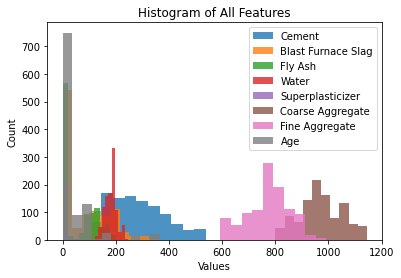

In [80]:
for col in features:
    plt.hist(raw_df[col], alpha=0.8, label=col)
    plt.title(f"Histogram of All Features")

plt.xlabel("Values")
plt.ylabel("Count")
plt.legend()
plt.savefig(f"./figures/histogram_by_features")
plt.show()

In [88]:
# min-max scaling of feature values

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(raw_df[features]), columns = features)
scaled_df[target] = raw_df[target]

assert scaled_df.shape == raw_df.shape, "normalized DataFrame is a different size"
scaled_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,79.986111
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,61.887366
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,40.269535
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,41.052780
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,44.296075


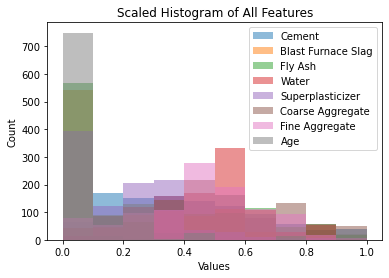

In [115]:
for col in features:
    plt.hist(scaled_df[col], alpha=0.5, label=col)
    plt.title(f"Scaled Histogram of All Features")

plt.xlabel("Values")
plt.ylabel("Count")
plt.legend()
plt.savefig(f"./figures/scaled_histogram_by_features")
plt.show()

In [91]:
scaled_df_train = scaled_df.iloc[0:900]
scaled_df_test = scaled_df.iloc[900:]

# Functions

In [7]:
def univariateLinearModel(x, y, alpha, maxIters, threshold, log=False):
    '''
    Train on labeled data to get the weights and error of a univariate linear model.
    
    Parameters:
        X: feature array
        y: observed target array
        alpha: learning rate
        maxIters: maximum number of iterations
        threshold: termination criteria for gradient descent
        
    Returns:
        m_star: slope of linear regressor
        b_star: bias of linear regressor
        mse_star: mean squared error on test data
    '''
    x, y, n = np.array(x), np.array(y), len(x)
    
    assert len(x)==len(y), f"data not of same size {len(x)} vs {len(y)}"
    
    m, b, iters = 0, 1, 0
    m_star, b_star = m, b
    mse_star, mse_prev = float('inf'), float('inf')
    
    aboveThreshold = True
    while iters < maxIters and aboveThreshold:
        predictions = x*m+b
        error = y-predictions
        mse = (error**2).sum()/n
        m += 2*alpha*np.dot(x,error)/n
        b += 2*alpha*np.sum(error)/n
        
        if mse < mse_star:
            mse_star, m_star, b_star = mse, m, b
        
        aboveThreshold = np.abs(mse_prev - mse) > threshold
        mse_prev = mse
        iters += 1
    
    print(f"Iterations: {iters}, m: {m_star}, b: {b_star}, MSE: {mse_star}")
    return m_star, b_star, mse_star 
    

In [161]:
def trainLinearRegression(X, y, isUnivariate, alpha, maxIters, threshold, log=False):
    '''
    Train on labeled data to get the weights and error of a linear model.
    
    Parameters:
        X: array of features
        y: array of observed labels
        alpha: learning rate
        maxIters: maximum number of iterations
        threshold: termination criteria for gradient descent
        log: if True, log output as training occurs
        
    Returns:
        m_star: slope of linear regressor
        b_star: bias of linear regressor
        mse_star: mean squared error on test data
    '''
    # set up variables 
    X, y, b = np.array(X), np.array(y), 1
    n = len(y)
    mses = np.zeros(maxIters+1)
    mses[0] = float('inf')
    overThreshold = True
    
    assert len(X)==len(y), "data is not the same length"
    
    if isUnivariate:
        X = X.reshape(-1,1)
        m = [0]
    else:
        m = np.zeros(X.shape[1])
    
    m_star, b_star, mse_star = m, b, mses[0]
    iters = 0

    if log: print("starting training...")
    while iters < maxIters and overThreshold:
        m_update = np.zeros(len(m))
        b_update, sse = 0, 0
        
        for i in range(n):
            x = X[i,:]
            y_pred = (np.dot(m,x) + b)
            error = y[i] - y_pred
            sse += (error)**2
            
            m_update += x * error
            b_update += error
        
        m += 2*alpha*m_update/n
        b += 2*alpha*b_update/n    
        

        iters += 1
        mses[iters] = sse/n
        
        if mses[iters] < mse_star: m_star, b_star, mse_star = np.array(m), np.array(b), mses[iters]
        overThreshold = np.abs(mses[iters-1]-mses[iters]) > threshold
        if log and iters % 100 == 0: print(f"iteration {iters}... m: {m}, b: {b}, MSE: {mses[iters]}")
    
    print(f"Iterations: {iters}, m: {m_star}, b: {b_star}, MSE: {mse_star}")
    return m_star, b_star, mse_star

In [34]:
def calculateVarianceExplained(X, y, m, b): 
    '''
    Test linear regression model on labeled data to get the explained variance
    
    Parameters:
        X: array of features
        y: array of observed labels
        alpha: learning rate
        m: gradient vector
        b: intercept

    Returns:
        mse: mean squared error
        var_explained: variance explained given by 1-(MSE/variance observered)
    '''
    X, y = np.array(X), np.array(y)
    n = len(y)
    
    # for univariate case, reshape array for calculations
    if len(X.shape) == 1:
        predictions = X*m+b
        error = y-predictions
        mse = (error**2).sum()/n
    else:
        sse = 0
        for i in range(n):
                x = X[i,:]
                y_pred = (np.dot(m,x) + b)
                error = y[i] - y_pred
                sse += (error)**2
        mse = sse/n
            
    var_observed = np.var(y)
    var_explained = 1 - (mse/var_observed)
    
    return mse, var_explained

# Univariate Results

In [135]:
# UNIVARIATE train all single-feature models
univ_ms, univ_bs, univ_mses = [0] * len(features), [0] * len(features), [0] * len(features)

y_train = df_train[target]
for i, feature in enumerate(features):
    print(feature)
    x_train = df_train[feature]
    
    # get values
    univ_ms[i], univ_bs[i], univ_mses[i] = univariateLinearModel(x_train, y_train, 0.000001, 10_000, 0.001)

Cement
Iterations: 33, m: 0.11668476608959902, b: 1.0004504832875736, MSE: 246.38062317965694
Blast Furnace Slag
Iterations: 10000, m: 0.21486265526431295, b: 1.4086858619750968, MSE: 962.3140528497996
Fly Ash
Iterations: 10000, m: 0.2672024117712247, b: 1.4414644099106646, MSE: 1071.4051087296589
Water
Iterations: 90, m: 0.1892117242551506, b: 1.0012313370564374, MSE: 355.9712863884688
Superplasticizer
Iterations: 10000, m: 2.630422639873143, b: 1.5131419655377347, MSE: 709.6013498806063
Coarse Aggregate
Iterations: 93, m: 0.03566095834293152, b: 1.000122813551286, MSE: 321.4148189446826
Fine Aggregate
Iterations: 7, m: 0.04466565874355487, b: 1.0000667805429457, MSE: 332.0168309216182
Age
Iterations: 10000, m: 0.3030373469870419, b: 1.411903355527309, MSE: 890.6483678054869


In [136]:
# UNIVARIATE train all single-feature models

for i, feature in enumerate(features):
    if feature in {"Blast Furnace Slag", "Fly Ash", "Superplasticizer", "Age"}:
        print(feature)
        x_train = df_train[feature]
        
        # get values
        univ_ms[i], univ_bs[i], univ_mses[i] = univariateLinearModel(x_train, y_train, 0.0001, 10_000, 0.001)

Blast Furnace Slag
Iterations: 1017, m: 0.5233240388165232, b: 1.0070749395397665, MSE: 1547.2340173841824
Fly Ash


/Users/quinnwaiwong/opt/anaconda3/envs/regr-algos/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/4b/jfgczg_n6239k0ssg5vw1_g40000gn/T/ipykernel_40176/2089863498.py:36: RuntimeWarning: invalid value encountered in double_scalars
  aboveThreshold = np.abs(mse_prev - mse) > threshold


Iterations: 10000, m: 0.07036852907791048, b: 26.45378538477083, MSE: 363.4583694669776
Superplasticizer
Iterations: 10000, m: 1.969192141106325, b: 19.73173019010562, MSE: 296.0754125688206
Age
Iterations: 10000, m: 0.1443713305909079, b: 23.90431803840659, MSE: 308.9286010059295


In [137]:
# UNIVARIATE train all single-feature models

for i, feature in enumerate(features):
    if feature in {"Blast Furnace Slag"}:
        print(feature)
        x_train = df_train[feature]
        
        # get values
        univ_ms[i], univ_bs[i], univ_mses[i] = univariateLinearModel(x_train, y_train, 0.00008, 10_000, 0.001)

Blast Furnace Slag
Iterations: 10000, m: 0.09816410216842614, b: 21.934247104183616, MSE: 388.3188271754185


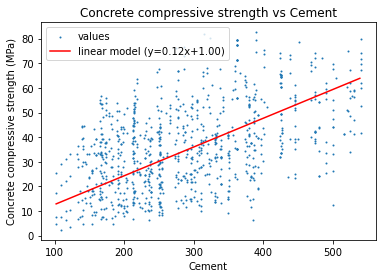

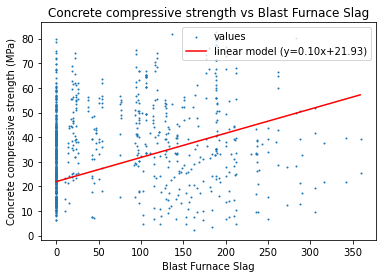

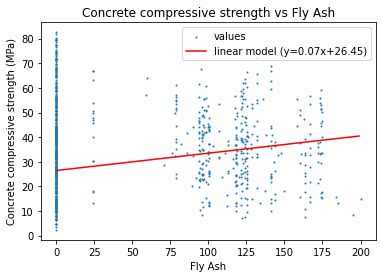

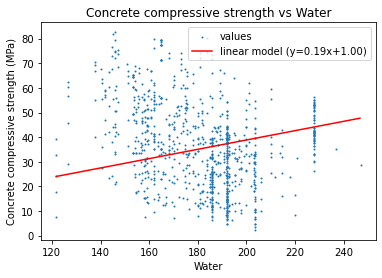

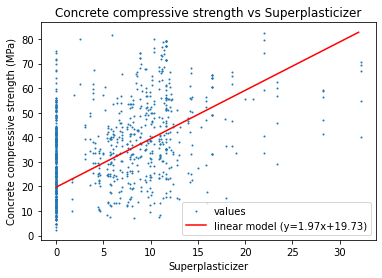

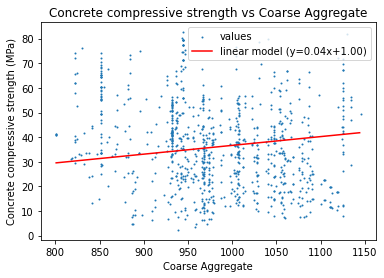

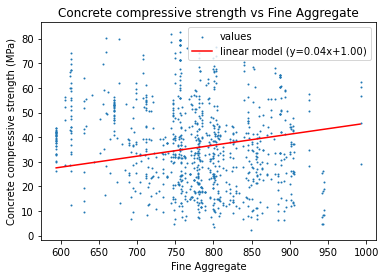

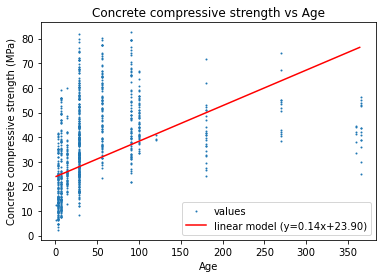

In [138]:
# UNIVARIATE: scatter plot of training data
for i, feature in enumerate(features):
    x_train = df_train[feature]
    plt.figure()
    plt.scatter(x_train, y_train, s=1, label='values')
    
    x_vals = np.arange(x_train.min(),x_train.max())
    y_vals = x_vals*univ_ms[i]+univ_bs[i]
    plt.plot(x_vals, y_vals, c="red", label=f'linear model (y={univ_ms[i]:.2f}x+{univ_bs[i]:.2f})')
    plt.xlabel(feature)
    plt.ylabel(f"{target} (MPa)")
    plt.title(f"{target} vs {feature}")
    plt.legend()
    plt.savefig(f"./figures/univariate_{feature.replace(' ', '_')}_model")
    plt.show()

In [139]:
# UNIVARIATE variance explained calculations for the train and test set for each single-feature models

y_test = df_test[target]
train_vars_explained, test_vars_explained = np.zeros(len(features)), np.zeros(len(features))
train_mses, test_mses = np.zeros(len(features)), np.zeros(len(features))

for i, feature in enumerate(features):
    x_train = df_train[feature]
    x_test = df_test[feature]
    
    # get values
    train_mses[i], train_vars_explained[i] = calculateVarianceExplained(x_train, y_train, univ_ms[i], univ_bs[i])
    test_mses[i], test_vars_explained[i] = calculateVarianceExplained(x_test, y_test, univ_ms[i], univ_bs[i])

In [140]:
train_mses,train_vars_explained

(array([246.38002587, 388.2997699 , 363.44161744, 355.97051728,
        296.06450751, 321.41397445, 332.01681538, 308.91645503]),
 array([ 0.16725463, -0.31242309, -0.22840447, -0.20315273, -0.00067506,
        -0.08635429, -0.12219107, -0.04411365]))

In [141]:
test_mses,test_vars_explained

(array([106.85900423, 134.83782809, 223.49930714, 185.0302509 ,
        234.39973536, 165.76561103, 170.9078175 , 159.84694074]),
 array([ 0.25647424,  0.06179737, -0.55510987, -0.28744188, -0.63095513,
        -0.15339837, -0.18917789, -0.11221622]))

# Multivariate Results

In [162]:
# train the all-feature model
X_train = df_train[features]
m_all_feats, b_all_feats, mse_all_feats = trainLinearRegression(X_train, y_train, False, 0.0000001, 10_000, 0.001)

Iterations: 8589, m: [ 0.11480334  0.09515289  0.10297017 -0.12811573  0.03466552 -0.00032591
  0.01119694  0.10536326], b: 0.9999650161683891, MSE: 119.80916426645973


In [166]:
# comparing 
print("Features and their coefficients...")
print("Feature \tunivariate_m \tmultivariate_m \tunivariate_b")
for i,feat in enumerate(features):
    print(f"{feat[0:6]} \t\t{univ_ms[i]:.3f} \t\t{m_all_feats[i]:.3f} \t\t{univ_bs[i]:.3f}")

Features and their coefficients...
Feature 	univariate_m 	multivariate_m 	univariate_b
Cement 		0.117 		0.115 		1.000
Blast  		0.098 		0.095 		21.934
Fly As 		0.070 		0.103 		26.454
Water 		0.189 		-0.128 		1.001
Superp 		1.969 		0.035 		19.732
Coarse 		0.036 		-0.000 		1.000
Fine A 		0.045 		0.011 		1.000
Age 		0.144 		0.105 		23.904


In [35]:
X_test = df_test[features]
    
# get values
train_all_mses, train_all_vars_explained = calculateVarianceExplained(X_train, y_train, m_all_feats, b_all_feats)
test_all_mses, test_all_vars_explained = calculateVarianceExplained(X_test, y_test, m_all_feats, b_all_feats)

In [38]:
print("train MSE and variance explained")
train_all_mses, train_all_vars_explained

train MSE and variance explained


(119.80816468530149, 0.5950576995185468)

In [39]:
print("test MSE and variance explained")
test_all_mses, test_all_vars_explained

test MSE and variance explained


(63.151911219290014, 0.560588524702636)

# All Normalized Results

In [103]:
# UNIVARIATE train all single-feature models
scaled_univ_ms, scaled_univ_bs, scaled_univ_mses = [0] * len(features), [0] * len(features), [0] * len(features)

scaled_y_train = scaled_df_train[target]
for i, feature in enumerate(features):
    print(feature)
    scaled_x_train = scaled_df_train[feature]
    
    # get values
    scaled_univ_ms[i], scaled_univ_bs[i], scaled_univ_mses[i] = univariateLinearModel(scaled_x_train, scaled_y_train, 0.003, 10_000, 0.001)

Cement
Iterations: 4649, m: 28.90744268700587, b: 24.0487830249251, MSE: 230.07608832552492
Blast Furnace Slag
Iterations: 788, m: 7.414338230303849, b: 34.726516376605865, MSE: 291.0667046130139
Fly Ash
Iterations: 2412, m: 0.5956847858239728, b: 36.153770882232955, MSE: 296.1911405572421
Water
Iterations: 9503, m: -18.651459782777675, b: 45.03094300913478, MSE: 273.4924602903178
Superplasticizer
Iterations: 6370, m: 29.490587592610137, b: 31.107433356558147, MSE: 246.6468440398321
Coarse Aggregate
Iterations: 6639, m: -8.611677731875501, b: 40.74465981558753, MSE: 286.7075452517897
Fine Aggregate
Iterations: 6462, m: -7.527421606184636, b: 39.69261753651658, MSE: 288.7454896439471
Age
Iterations: 5623, m: 22.56620468945726, b: 33.4860796272181, MSE: 265.39945572978274


In [110]:
np.arange(scaled_x_train.min(),scaled_x_train.max(), 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

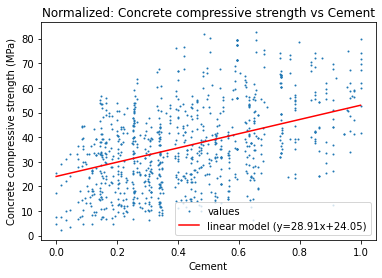

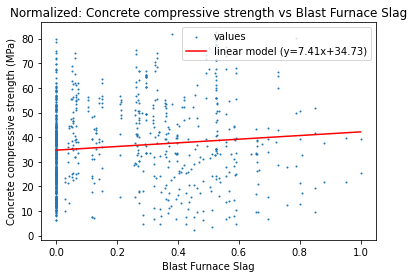

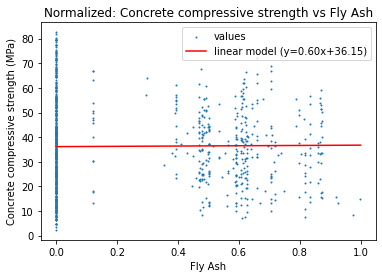

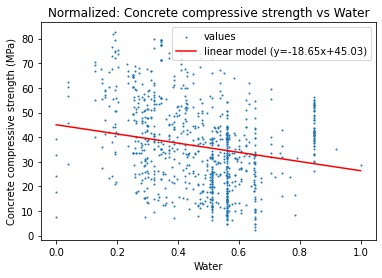

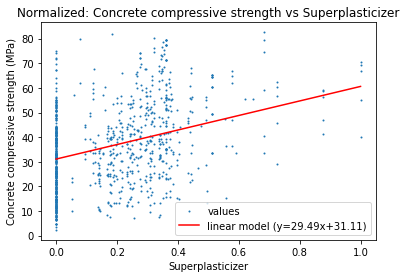

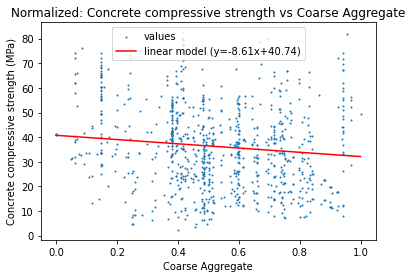

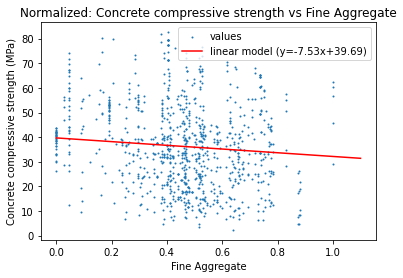

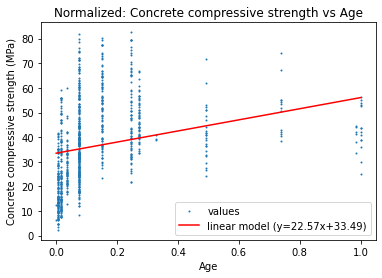

In [116]:
# UNIVARIATE: scatter plot of training data
for i, feature in enumerate(features):
    scaled_x_train = scaled_df_train[feature]
    plt.figure()
    plt.scatter(scaled_x_train, scaled_y_train, s=1, label='values')
    
    x_vals = np.arange(scaled_x_train.min(),scaled_x_train.max()+0.1, 0.1)
    y_vals = x_vals*scaled_univ_ms[i]+scaled_univ_bs[i]
    plt.plot(x_vals, y_vals, c="red", label=f'linear model (y={scaled_univ_ms[i]:.2f}x+{scaled_univ_bs[i]:.2f})')
    plt.xlabel(feature)
    plt.ylabel(f"{target} (MPa)")
    plt.title(f"Normalized: {target} vs {feature}")
    plt.legend()
    plt.savefig(f"./figures/scaled_univariate_{feature.replace(' ', '_')}_model")
    plt.show()

In [124]:
# UNIVARIATE variance explained calculations for the train and test set for each single-feature models

scaled_y_test = scaled_df_test[target]
scaled_train_ves, scaled_test_ves = np.zeros(len(features)), np.zeros(len(features))
scaled_train_mses, scaled_test_mses = np.zeros(len(features)), np.zeros(len(features))

for i, feature in enumerate(features):
    scaled_x_train = scaled_df_train[feature]
    scaled_x_test = scaled_df_test[feature]
    
    # get values
    scaled_train_mses[i], scaled_train_ves[i] = calculateVarianceExplained(scaled_x_train, scaled_y_train, scaled_univ_ms[i], scaled_univ_bs[i])
    scaled_test_mses[i], scaled_test_ves[i] = calculateVarianceExplained(scaled_x_test, scaled_y_test, scaled_univ_ms[i], scaled_univ_bs[i])

In [125]:
scaled_train_mses,scaled_train_ves

(array([230.07508904, 291.06572237, 296.19014169, 273.49146075,
        246.64584454, 286.70654585, 288.74449024, 265.39845645]),
 array([ 0.22236405,  0.01622044, -0.0010997 ,  0.07562008,  0.16635618,
         0.03095412,  0.02406603,  0.10297381]))

In [126]:
scaled_test_mses,scaled_test_ves

(array([ 84.686407  , 157.05099436, 166.05073089, 152.83739344,
        216.15854849, 172.29639494, 163.05087623, 153.9420834 ]),
 array([ 0.41075134, -0.09276201, -0.15538224, -0.06344374, -0.50403281,
        -0.19883962, -0.13450923, -0.07113018]))

In [123]:
# train the all-feature model
scaled_X_train = scaled_df_train[features]
scaled_m_all_feats, scaled_b_all_feats, scaled_mse_all_feats = trainLinearRegression(scaled_X_train, scaled_y_train, False, 0.01, 10_000, 0.001)

Iterations: 4812, m: [ 37.12782371  22.53135144   9.12772547 -18.28305874  22.04348548
   0.50737289  -5.03521945  37.21457375], b: 15.711788167985125, MSE: 117.80143381898534


In [144]:
scaled_X_test = scaled_df_test[features]
    
# get values
scaled_train_all_mse, scaled_train_all_ve = calculateVarianceExplained(scaled_X_train, scaled_y_train, scaled_m_all_feats, scaled_b_all_feats)
scaled_test_all_mse, scaled_test_all_ve = calculateVarianceExplained(scaled_X_test, scaled_y_test, scaled_m_all_feats, scaled_b_all_feats)

In [147]:
print("train MSE and variance explained")
scaled_train_all_mse, scaled_train_all_ve

train MSE and variance explained


(117.80043438785255, 0.6018436721401192)

In [148]:
print("test MSE and variance explained")
scaled_test_all_mse, scaled_test_all_ve

test MSE and variance explained


(72.94672329466275, 0.49243614829466265)